# Lab / HomeWork
## Principal component analysis (PCA)

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.offline as py

### What is PCA ?     
https://en.wikipedia.org/wiki/Principal_component_analysis 
https://setosa.io/ev/principal-component-analysis/

### PCA steps

1. Calculate de covariance matrix : this can be done in 2 ways:

a. First way (using numpy.cov())
        
> Set the mu : $$\mu = I^{-1}\sum_{i=1}^{I} x^{(i)} $$ with $X_{I\times N}$
>
>preprocess X by subtracting $\mu$ : $ \hat{x} = x - \mu $
>
>Compute variance of $\hat{x}$ (can be done with numpy.cov()
>https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html
>
b. second way (not using numpy.cov())
> Compute mean vector of input data : $M_{N\times 1}$
>
>compute covariance : cov_matrix $\sum = \frac{(x - M)^T (x - M)}{x.shape - 1} $
>
2. Compute eigenvalues and eigenvector and select the most significant ones

    a. Calculate the new matrix w to decrease dimension and only keep the relevant ones
> matrix w : ${U_P}_{N\times P}$
3. Project $$\hat{x}$$ onto $U_{N\times P}$
> $ \hat{Y} = \hat{X}_{I\times P} \times {U_P^T}_{N\times P}$


In [154]:
class PCA:

    def __init__(self, file_path):
        self.data = pd.read_csv(file_path, header=None, sep=" ")
        self.x = self.data.iloc[:,0:2].values
        self.mu = self.set_mu()
        self.new_x = self.pre_process_x()
        self.cov = self.covariance_of_x()
        self.cov_matrix = self.covariance_matrix()
        self.p_most_significant_eigen = self.p_most_significant_eigenvalues()
        self.eigenvalues = self.p_most_significant_eigen[0]
        self.eigenvectors = self.p_most_significant_eigen[1]
        self.matrix_w = self.sorting_eigenvectors()
        self.transformed = self.project()
        
    # cov matrix a step 1
    def set_mu(self):
        return self.data.mean(axis=0)
    # cov matrix a step 2
    def pre_process_x(self):
        return self.data.sub(self.mu, axis=1)
    
    # cov matrix a step 3
    def covariance_of_x(self):
        x_data = np.array(self.new_x)
        cov_matrix = np.cov(x_data.T)
        print('covariance Matrix:\n', cov_matrix)
        return cov_matrix
    
    # cov matrix b step 1
    def covariance_matrix(self):
        x = np.array(self.x)
        mean_vec = np.mean(x, axis=0)
        cov_matrix = (x - mean_vec).T.dot((x -mean_vec)) / (x.shape[0]-1)
        print('\ncovariance Matrix:\n', cov_matrix)
        return cov_matrix
       
    def p_most_significant_eigenvalues(self):
        values, vectors = np.linalg.eig(self.cov)
        print('\nEigenvalues :\n', values)
        print('\nEigenvector :\n', vectors)
        return values, vectors
    
    def test_eigenvector_value_calculation(self):
        status = "\neigenvector calculation is correct and satisfy the equation Σv=λv"
        for i in range(len(self.eigenvalues)):
            eigv = self.eigenvectors[:, i].reshape(1,2).T
            state = np.testing.assert_array_almost_equal(self.cov.dot(eigv), self.eigenvalues[i]*eigv, decimal=6, err_msg='bad', verbose=True)
            if state is not None :
                status = 'eigenvector calculation is not correct and does not satisfy the equation Σv=λv'
        print(status)
        
    def sorting_eigenvectors(self):
        self.test_eigenvector_value_calculation()
        eig_pairs = [(np.abs(self.eigenvalues[i]), self.eigenvectors[:, i]) for i in range(len(self.eigenvalues))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        # verifying it well sorted
        print("\nEigenvalues in descending order:")
        for i in eig_pairs:
            print(i[0])
            
        matrix_w = np.hstack((eig_pairs[0][1].reshape(2)))
        print('\nMatrix W:\n', matrix_w)
        return matrix_w
        
    def project(self):
        transformed = np.array(self.x).dot(self.matrix_w)
        print('\nTransformed Y:\n', transformed)
        return transformed

In [155]:
class PCA(PCA):    
    def plot(self):
        data = []
        trace = dict(
            type='scatter',
            x=self.data[0],
            y=self.data[1],
            mode='markers',
            marker=dict(
                size=12,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5),
                opacity=0.8)
        )
        data.append(trace)
        
        layout = dict(
            title='Input data',
            yaxis=dict(
                title='Input 2'
            ),
            xaxis=dict(
                title="input 1"
            ),
            showlegend=True,
            scene=dict(
                xaxis=dict(title='PC1'),
                yaxis=dict(title='PC2')
            )
        )
        
        fig = dict(data=data, layout=layout)
        py.iplot(fig, filename='data_input.png')
    
    def plot_data(self):
        plt.plot(self.transformed[0:25], self.transformed[0:25], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
        plt.plot(self.transformed[25:50], self.transformed[25:50], '^', markersize=7, color='red', alpha=0.5, label='class2')
        plt.xlim([0,10])
        plt.ylim([0,10])
        plt.xlabel('x_values')
        plt.ylabel('y_values')
        plt.legend()
        plt.title('Transformed samples with class labels')
        
    def plot_test(self):
        data = []
        colors = ["red", "blue"]
        for i in range (2):
            trace = dict(
                type='scatter',
                x=self.transformed[0+i*25:25+i*25],
                y=self.transformed[0+i*25:25+i*25],
                mode='markers',
                marker=dict(
                    size=12,
                    color=colors[i],
                    line=dict(
                        color='rgba(217, 217, 217, 0.14)',
                        width=0.5),
                    opacity=0.8)
            )
            data.append(trace)
        
        layout = dict(
            showlegend=True,
            scene=dict(
                xaxis=dict(title='PC1'),
                yaxis=dict(title='PC2')
            )
        )
        
        fig = dict(data=data, layout=layout)
        py.iplot(fig, filename='projection-matrix')
        
    def test_plot(self):
        tot = sum(self.eigenvalues)
        var_exp = [(i / tot)*100 for i in sorted(self.eigenvalues, reverse=True)]
        cum_var_exp = np.cumsum(var_exp)
        
        trace1 = dict(
            type='bar',
            x=['PC %s' %i for i in range(1,3)],
            y=var_exp,
            name='Individual'
        )
        
        trace2 = dict(
            type='scatter',
            x=['PC %s' %i for i in range(1,3)], 
            y=cum_var_exp,
            name='Cumulative'
        )
        
        data = [trace1, trace2]
        
        layout=dict(
            title='Explained variance by different principal components',
            yaxis=dict(
                title='Explained variance in percent'
            ),
            annotations=list([
                dict(
                    x=1.16,
                    y=1.05,
                    xref='paper',
                    yref='paper',
                    text='Explained Variance',
                    showarrow=False,
                )
            ])
        )
        
        fig = dict(data=data, layout=layout)
        py.iplot(fig, filename='selecting-principal-components')
        
pca = PCA("data_pca.txt")

covariance Matrix:
 [[1.37606477 0.88301454]
 [0.88301454 1.04737128]]

covariance Matrix:
 [[1.37606477 0.88301454]
 [0.88301454 1.04737128]]

Eigenvalues :
 [2.10989648 0.31353957]

Eigenvector :
 [[ 0.76908317 -0.63914872]
 [ 0.63914872  0.76908317]]

eigenvector calculation is correct and satisfy the equation Σv=λv

Eigenvalues in descending order:
2.1098964809485423
0.31353957381472297

Matrix W:
 [0.76908317 0.63914872]

Transformed Y:
 [4.76687056 7.22403609 4.86237831 4.50136192 4.85803761 7.13932442
 4.99507873 8.81630608 6.28028668 7.10252857 6.96779635 6.85271986
 6.39055606 7.01254078 4.58927841 8.36838499 7.22505976 5.14929311
 8.63634864 6.95565493 8.65954094 5.82279047 8.24901342 6.27621008
 4.43355265 5.63842677 7.59732608 7.72032609 5.24641114 6.25072474
 6.33770224 8.05097402 4.85241776 7.0920303  5.51393288 7.6711713
 4.4424997  7.86023328 3.45775482 6.591115   7.2513712  5.28098506
 4.87605871 7.30300167 4.38872729 6.51096904 2.74758937 4.71705766
 5.92143446 7.8254

### Plot Input data

In [156]:
pca.plot()

### Plot variance principal components

In [157]:
pca.test_plot()

### Plot Output data

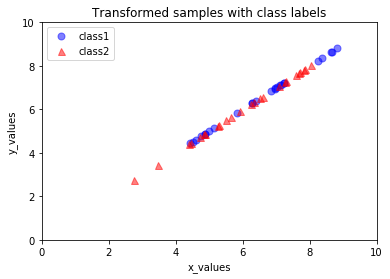

In [158]:
pca.plot_data()

pca.plot_test()
